### Regional Grain Size Model

Dan Buscombe 3/24/22

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from pingouin import partial_corr
import pingouin as pg

In [2]:
bujan_dat = pd.read_csv('./data/bujan_et_al_data/Size-Slope-Data-Points.csv')
bujan_dat#.keys()

bujan_sand = bujan_dat[bujan_dat['Clast size (mm)']<2]

In [3]:
# join_dist=.0015
join_dist=.001
# join_dist=0.0005

choice = 'transects'
merge = 'right'
dataset = 'Data_Post2012_VerifiedOnshore'

In [4]:
tmp = pd.read_csv('ML_slope_wave_atlantic_'+dataset+'_'+str(join_dist)+'_'+merge+'_'+choice+'.csv')

In [5]:
len(tmp)

2814

In [414]:
# tmp.keys()

In [6]:
ind = np.where(tmp['quality_flag_right']!='Low')[0]
len(ind)
tmp = tmp.iloc[ind]
len(tmp)

2646

In [7]:
try:
    num_cats=8
    num_samples_per_category = 30

    tmp['category'] = pd.cut(tmp['mstr'], num_cats)
    tmp = tmp.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)
except:
    num_cats=5
    num_samples_per_category = 30

    tmp['category'] = pd.cut(tmp['mstr'], num_cats)
    tmp = tmp.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

In [11]:
# np.unique(tmp['category'])

In [8]:
len(tmp)

240

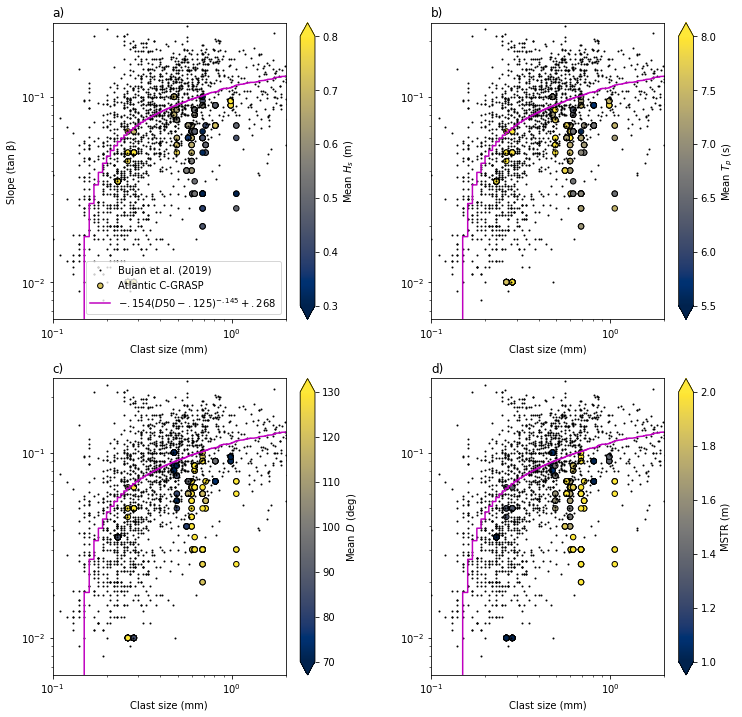

In [13]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

plt.subplot(221)

plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
# plt.scatter(gs_slope_waves['d50'], gs_slope_waves['tanBeta'],20,gs_slope_waves['hs_mean'],label='Atlantic C-GRASP')
plt.scatter(tmp['d50'], tmp['beach_slope'],30,tmp['hs_mean'],label='Atlantic C-GRASP', cmap='cividis', vmin=.3, vmax=.8, lw=1,edgecolors='black')

plt.xlabel('Clast size (mm)')
plt.ylabel('Slope (tan β)')
cb = plt.colorbar(extend='both')
plt.title("a)", loc='left')


cb.set_label(r'Mean $H_s$ (m)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')

plt.xlim(0.1,2)
plt.ylim(10**-2.2,10**-.6)

plt.legend()

plt.subplot(222)
plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
plt.scatter(tmp['d50'], tmp['beach_slope'],30,tmp['tp'],label='Atlantic C-GRASP', cmap='cividis', vmin=5.5, vmax=8, lw=1,edgecolors='black')
plt.title("b)", loc='left')

plt.xlabel('Clast size (mm)')
# plt.ylabel('Slope (tan β)')
cb = plt.colorbar(extend='both')

cb.set_label(r'Mean $T_p$ (s)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')

plt.xlim(0.1,2)
plt.ylim(10**-2.2,10**-.6)

plt.subplot(223)
plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
plt.scatter(tmp['d50'], tmp['beach_slope'],30,tmp['dir'],label='Atlantic C-GRASP', cmap='cividis', vmin=70, vmax=130, lw=1,edgecolors='black')

plt.xlabel('Clast size (mm)')
# plt.ylabel('Slope (tan β)')
cb = plt.colorbar(extend='both')

cb.set_label(r'Mean $D$ (deg)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')
plt.title("c)", loc='left')

plt.ylim(10**-2.2,10**-.6)
plt.xlim(0.1,2)


plt.subplot(224)
plt.loglog(bujan_dat['Clast size (mm)'], bujan_dat['Slope (tan β)'],'ko', markersize=1, label='Bujan et al. (2019)')
plt.scatter(tmp['d50'], tmp['beach_slope'],30,tmp['mstr'],label='Atlantic C-GRASP', cmap='cividis', vmin=1, vmax=2, lw=1,edgecolors='black')

plt.xlabel('Clast size (mm)')
# plt.ylabel('Slope (tan β)')
cb = plt.colorbar(extend='both')

cb.set_label(r'MSTR (m)')

a = -0.154
b = -0.145
c = 0.268
ln = a*( bujan_dat['Clast size (mm)'] - 0.125)**b + c

plt.plot(np.sort(bujan_dat['Clast size (mm)']), np.sort(ln),'m', label=r'$-.154(D50 - .125)^{-.145} + .268$')
plt.title("d)", loc='left')

plt.ylim(10**-2.2,10**-.6)
plt.xlim(0.1,2)

plt.savefig('CGRASP_d50-slope-waveHs-Tp-Dir-MSTR-v2.jpg', dpi=300, bbox_inches='tight')

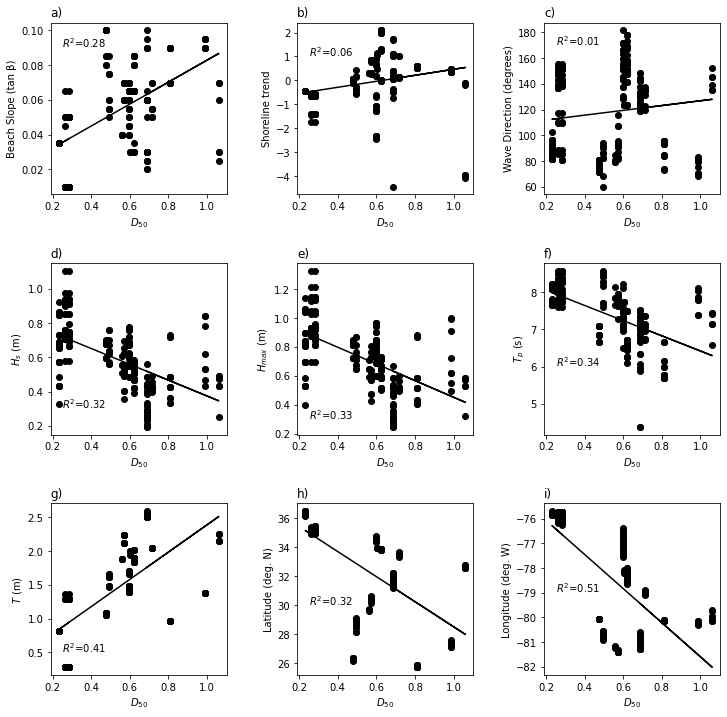

In [14]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(331)
plt.plot(tmp['d50'], tmp['beach_slope'],'ko')
plt.xlabel(r'$D_{50}$')
plt.ylabel('Beach Slope (tan β)')
plt.title("a)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['beach_slope'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['beach_slope']))**2
plt.text(.25,.09,r'$R^2$='+str(r2)[:4])

plt.subplot(332)
plt.plot(tmp['d50'], tmp['trend'],'ko')
plt.xlabel(r'$D_{50}$')
plt.ylabel('Shoreline trend')
plt.title("b)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['trend'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['trend']))**2
plt.text(.25,1,r'$R^2$='+str(r2)[:4])

plt.subplot(333)
plt.plot(tmp['d50'], tmp['dir'],'ko')
plt.xlabel(r'$D_{50}$')
plt.ylabel('Wave Direction (degrees)')
plt.title("c)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['dir'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['dir']))**2
plt.text(.25,170,r'$R^2$='+str(r2)[:4])

plt.subplot(334)
plt.plot(tmp['d50'], tmp['hs_mean'],'ko')
plt.xlabel(r'$D_{50}$')
plt.ylabel(r'$H_{s}$ (m)')
plt.title("d)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['hs_mean'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['hs_mean']))**2
plt.text(.25,.3,r'$R^2$='+str(r2)[:4])

plt.subplot(335)
plt.plot(tmp['d50'], tmp['hs_max'],'ko')
plt.xlabel(r'$D_{50}$')
plt.ylabel(r'$H_{max}$ (m)')
plt.title("e)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['hs_max'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['hs_max']))**2
plt.text(.25,.3,r'$R^2$='+str(r2)[:4])

plt.subplot(336)
plt.plot(tmp['d50'], tmp['tp'],'ko')
plt.xlabel(r'$D_{50}$')
plt.ylabel(r'$T_{p}$ (s)')
plt.title("f)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['tp'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['tp']))**2
plt.text(.25,6,r'$R^2$='+str(r2)[:4])

plt.subplot(337)
plt.plot(tmp['d50'],tmp['mstr'] ,'ko')
plt.xlabel(r'$D_{50}$')
plt.ylabel(r'$T$ (m)')
plt.title("g)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['mstr'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['mstr']))**2
plt.text(.25,.5,r'$R^2$='+str(r2)[:4])

plt.subplot(338)
plt.plot(tmp['d50'],tmp['latitude'] ,'ko')
plt.xlabel(r'$D_{50}$')
plt.ylabel(r'Latitude (deg. N)')
plt.title("h)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['latitude'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['latitude']))**2
plt.text(.25,30,r'$R^2$='+str(r2)[:4])

plt.subplot(339)
plt.plot(tmp['d50'],tmp['longitude'] ,'ko')
plt.xlabel(r'$D_{50}$')
plt.ylabel(r'Longitude (deg. W)')
plt.title("i)", loc='left')

coef = np.polyfit(tmp['d50'], tmp['longitude'],1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

r2 = np.min(np.corrcoef(tmp['d50'], tmp['longitude']))**2
plt.text(.25,-79,r'$R^2$='+str(r2)[:4])

plt.savefig('CGRASP_d50-allcovars-linreg-v2.jpg', dpi=300, bbox_inches='tight')

### make models

In [15]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 50, #5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

test_size = 0.6

In [16]:
feature_names1 = ['Slope', 'Trend', 'MSTR']
X = np.stack((tmp['beach_slope_median'],tmp['trend'],tmp['mstr']))
#lam,df['hs_max'],
X.shape

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X.T, tmp['d50'], test_size=test_size, random_state=2022
)

model1 = ensemble.GradientBoostingRegressor(**params)
model1.fit(X_train1, y_train1)

mse1 = mean_squared_error(y_test1, model1.predict(X_test1))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse1))

The mean squared error (MSE) on test set: 0.0042


In [18]:
feature_names2 = ['Slope','MSTR']
X = np.stack((tmp['beach_slope_median'],tmp['mstr']))
#lam,df['hs_max'],
X.shape

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X.T, tmp['d50'], test_size=test_size, random_state=2022
)

model2 = ensemble.GradientBoostingRegressor(**params)
model2.fit(X_train2, y_train2)

mse2 = mean_squared_error(y_test2, model2.predict(X_test2))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse2))

The mean squared error (MSE) on test set: 0.0039


In [19]:
feature_names3 = ['Hs', 'Tp', 'Dir']
X = np.stack((tmp['hs_mean'],tmp['tp'],tmp['dir']))
#lam,df['hs_max'],
X.shape

X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X.T, tmp['d50'], test_size=test_size, random_state=2022
)

model3 = ensemble.GradientBoostingRegressor(**params)
model3.fit(X_train3, y_train3)

mse3 = mean_squared_error(y_test3, model3.predict(X_test3))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse3))

The mean squared error (MSE) on test set: 0.0198


In [20]:
feature_names4 = ['Hs', 'Tp', 'Dir','MSTR']
X = np.stack((tmp['hs_mean'],tmp['tp'],tmp['dir'],tmp['mstr']))
X.shape

X_train4, X_test4, y_train4, y_test4 = train_test_split(
    X.T, tmp['d50'], test_size=test_size, random_state=2022
)

model4 = ensemble.GradientBoostingRegressor(**params)
model4.fit(X_train4, y_train4)

mse4 = mean_squared_error(y_test4, model4.predict(X_test4))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse4))

The mean squared error (MSE) on test set: 0.0048


In [21]:
def mcfall(X,hs):
    if hs<=1:
        A = 3.1; n = -1.1 
    elif hs>=3:
        A = 3.9; n = -1.85         
    else:
        A = 2.1; n = -1.8             
    return (X/A)**(1/n)

In [22]:
ds_est_baseline = [mcfall(X,hs) for X,hs in zip(1/tmp['beach_slope'],tmp['hs_mean'])]

(array([28.,  6., 50.,  7., 20., 31., 48.,  8., 25., 17.]),
 array([0.04251191, 0.07274344, 0.10297497, 0.1332065 , 0.16343803,
        0.19366957, 0.2239011 , 0.25413263, 0.28436416, 0.31459569,
        0.34482722]),
 <BarContainer object of 10 artists>)

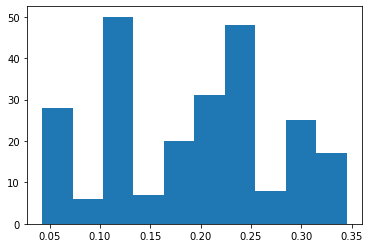

In [23]:
plt.hist(ds_est_baseline)

In [24]:
def bujan(B,a,b,c):
    t1=(B-c)
    return (1/8)*(8*((t1/a))**(1/b)+1)

In [25]:
a = -0.154
b = -0.145
c = 0.268

ds_est_baseline2 = [bujan(B,a,b,c) for B in tmp['beach_slope']]

(array([95., 47., 48.,  3.,  5., 12., 13.,  0.,  5., 12.]),
 array([0.15347671, 0.20550589, 0.25753508, 0.30956427, 0.36159345,
        0.41362264, 0.46565183, 0.51768102, 0.5697102 , 0.62173939,
        0.67376858]),
 <BarContainer object of 10 artists>)

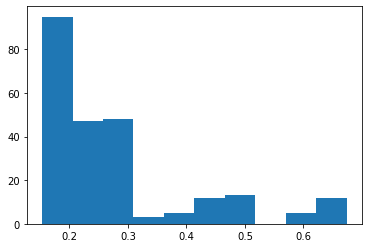

In [26]:
plt.hist(ds_est_baseline2)

In [28]:
def prc_err(y,yest):
    return 100*(np.abs(y-yest)/y)

7.41491717227655
7.989832274614518
19.85861993627269
9.477071510414248


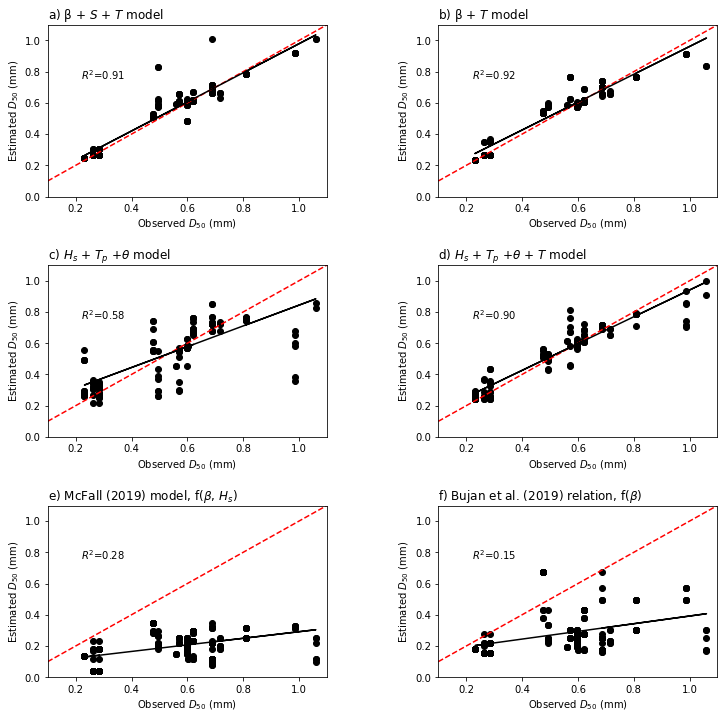

In [31]:
plt.figure(figsize=(12,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.subplot(321)
ds_est = model1.predict(X_test1)
plt.plot(y_test1, ds_est, 'ko')
plt.xlim(0.1,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("a) β + $S$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test1, ds_est))**2
plt.text(.22,.75,r'$R^2$='+str(r2)[:4])

print(np.mean(prc_err(y_test1,ds_est)))

coef = np.polyfit(y_test1, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test1, poly1d_fn(y_test1), '-k')

plt.subplot(322)
ds_est = model2.predict(X_test2)
plt.plot(y_test2, ds_est, 'ko')
plt.xlim(0.1,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("b) β + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test2, ds_est))**2
plt.text(.22,.75,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test2, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test2, poly1d_fn(y_test2), '-k')

print(np.mean(prc_err(y_test2,ds_est)))

plt.subplot(323)
ds_est = model3.predict(X_test3)
plt.plot(y_test3, ds_est, 'ko')
plt.xlim(0.1,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"c) $H_s$ + $T_p$ +$\theta$ model", loc='left')
r2 = np.min(np.corrcoef(y_test3, ds_est))**2
plt.text(.22,.75,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test3, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test3, poly1d_fn(y_test3), '-k')

print(np.mean(prc_err(y_test3,ds_est)))

plt.subplot(324)
ds_est = model4.predict(X_test4)
plt.plot(y_test4, ds_est, 'ko')
plt.xlim(0.1,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) $H_s$ + $T_p$ +$\theta$ + $T$ model", loc='left')
r2 = np.min(np.corrcoef(y_test4, ds_est))**2
plt.text(.22,.75,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(y_test4, ds_est,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(y_test4, poly1d_fn(y_test4), '-k')

print(np.mean(prc_err(y_test4,ds_est)))

plt.subplot(325)
plt.plot(tmp['d50'], ds_est_baseline, 'ko')
plt.xlim(0.1,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) McFall (2019) model, f($\beta$, $H_s$) ", loc='left')
r2 = np.min(np.corrcoef(tmp['d50'], ds_est_baseline))**2
plt.text(.22,.75,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(tmp['d50'], ds_est_baseline,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')


plt.subplot(326)
plt.plot(tmp['d50'], ds_est_baseline2, 'ko')
plt.xlim(0.1,1.1); plt.ylim(0,1.1)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) Bujan et al. (2019) relation, f($\beta$)", loc='left')
r2 = np.min(np.corrcoef(tmp['d50'], ds_est_baseline2))**2
plt.text(.22,.75,r'$R^2$='+str(r2)[:4])

coef = np.polyfit(tmp['d50'], ds_est_baseline2,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(tmp['d50'], poly1d_fn(tmp['d50']), '-k')

plt.savefig('CGRASP_d50-6models-1:1.jpg', dpi=300, bbox_inches='tight')

#### partial correlation analysis

In [81]:
partial_corr(data=tmp, x='beach_slope', y='d50', covar=['mstr'], method='pearson')

,n,r,CI95%,p-val
pearson,240,0.424637,"[0.31, 0.52]",7.002498e-12


In [82]:
.4246**2

0.18028515999999997

In [83]:
partial_corr(data=tmp, x='mstr', y='d50', covar=['beach_slope'], method='pearson')

,n,r,CI95%,p-val
pearson,240,0.572443,"[0.48, 0.65]",3.308536e-22


In [84]:
.572**2

0.3271839999999999

In [50]:
partial_corr(data=tmp, x='mstr', y='d50', covar=['beach_slope','hs_mean','tp','dir'], method='pearson')

,n,r,CI95%,p-val
pearson,240,0.37783,"[0.26, 0.48]",2.006382e-09


In [51]:
partial_corr(data=tmp, x='beach_slope', y='d50', covar=['mstr','hs_mean','tp','dir'], method='pearson')

,n,r,CI95%,p-val
pearson,240,0.269584,"[0.15, 0.38]",0.000027


In [55]:
partial_corr(data=tmp, x='mstr', y='d50', covar=['beach_slope','dir'], method='pearson')

,n,r,CI95%,p-val
pearson,240,0.529243,"[0.43, 0.62]",1.396476e-18


In [ ]:
partial_corr(data=tmp, x='mstr', y='d50', covar=['beach_slope','dir'], method='pearson')

In [61]:
X = pg.pairwise_corr(tmp[['beach_slope','d50','mstr','tp','dir','hs_mean']].copy(), columns=['d50'], method='spearman', alternative='greater', padjust='bonf').round(3)

In [68]:
X

,X,Y,method,alternative,n,r,CI95%,p-unc,p-corr,p-adjust,power
0,d50,beach_slope,spearman,greater,240,0.449,"[0.36, 1.0]",0.000,0.000,bonf,1.000
1,d50,mstr,spearman,greater,240,0.671,"[0.61, 1.0]",0.000,0.000,bonf,1.000
2,d50,tp,spearman,greater,240,-0.678,"[-0.73, 1.0]",1.000,1.000,bonf,0.000
3,d50,dir,spearman,greater,240,0.187,"[0.08, 1.0]",0.002,0.009,bonf,0.899
4,d50,hs_mean,spearman,greater,240,-0.625,"[-0.69, 1.0]",1.000,1.000,bonf,0.000


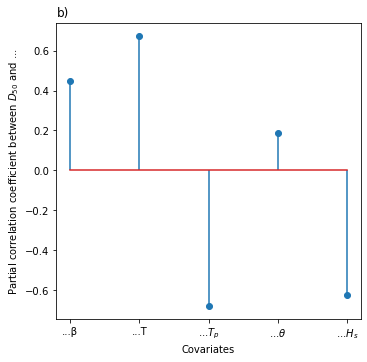

In [80]:

plt.figure(figsize=(12,12))
ax=plt.subplot(222)
plt.stem(X['r'])
plt.xticks([0,1,2,3,4])
ax.set_xticklabels(['...β','...T',r'...$T_p$',r'...$\theta$',r'...$H_s$'])

plt.ylabel(r'Partial correlation coefficient between $D_{50}$ and ...')
plt.xlabel(r'Covariates')
plt.title(r"b)", loc='left')

plt.savefig('Partial_correl_b.jpg', dpi=300, bbox_inches='tight')

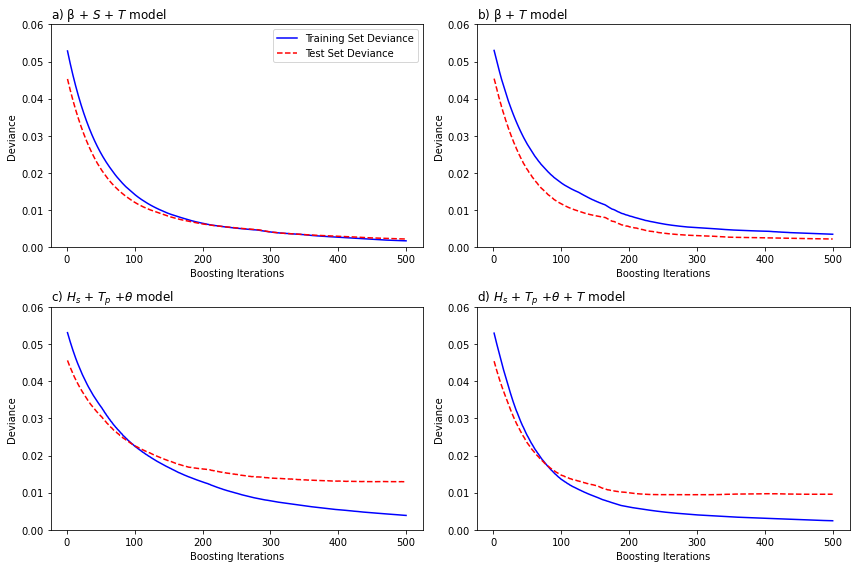

In [515]:
fig=plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred1 in enumerate(model1.staged_predict(X_test1)):
    test_score[i] = model1.loss_(y_test1, y_pred1)
    
plt.subplot(2, 2, 1)
plt.title("a) β + $S$ + $T$ model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model1.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred2 in enumerate(model2.staged_predict(X_test2)):
    test_score[i] = model2.loss_(y_test2, y_pred2)
    
plt.subplot(2, 2, 2)
plt.title("b) β + $T$ model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model2.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test Set Deviance"
)
# plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred3 in enumerate(model3.staged_predict(X_test3)):
    test_score[i] = model3.loss_(y_test3, y_pred3)
    
plt.subplot(2, 2, 3)
plt.title(r"c) $H_s$ + $T_p$ +$\theta$ model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model3.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test Set Deviance"
)
# plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
plt.ylim(0,.06)

test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred4 in enumerate(model4.staged_predict(X_test4)):
    test_score[i] = model4.loss_(y_test4, y_pred4)
    
plt.subplot(2, 2, 4)
plt.title(r"d) $H_s$ + $T_p$ +$\theta$ + $T$ model", loc='left')
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    model4.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r--", label="Test Set Deviance"
)
# plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
plt.ylim(0,.06)

fig.tight_layout()
# plt.show()
plt.savefig('CGRASP_d50-4models-training-v2.jpg', dpi=300, bbox_inches='tight')

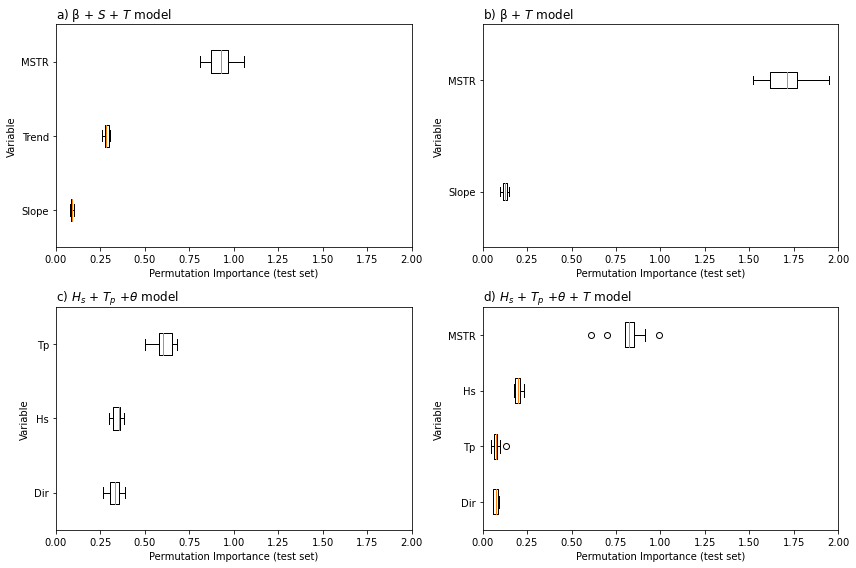

In [516]:

fig=plt.figure(figsize=(12,8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

result = permutation_importance(
    model1, X_test1, y_test1, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(221)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names1)[sorted_idx],
)
plt.xlim(0,2)
plt.title("a) β + $S$ + $T$ model", loc='left')
plt.xlabel("Permutation Importance (test set)")
plt.ylabel("Variable")


result = permutation_importance(
    model2, X_test2, y_test3, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(222)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names2)[sorted_idx],
)

plt.xlim(0,2)
plt.title("b) β + $T$ model", loc='left')
plt.xlabel("Permutation Importance (test set)")
plt.ylabel("Variable")

result = permutation_importance(
    model3, X_test3, y_test3, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(223)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names3)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"c) $H_s$ + $T_p$ +$\theta$ model", loc='left')
plt.xlabel("Permutation Importance (test set)")
plt.ylabel("Variable")

result = permutation_importance(
    model4, X_test4, y_test4, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(224)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(feature_names4)[sorted_idx],
)
plt.xlim(0,2)
plt.title(r"d) $H_s$ + $T_p$ +$\theta$ + $T$ model", loc='left')
plt.xlabel("Permutation Importance (test set)")
plt.ylabel("Variable")

fig.tight_layout()

plt.savefig('CGRASP_d50-4models-featimps-v2.jpg', dpi=300, bbox_inches='tight')


In [12]:
fenster_dat = pd.read_csv('Fenster2015_VAbarriers.csv')
fenster_locs = pd.read_csv('Fenster2015_locs.csv')

In [501]:
X_predict = np.vstack((tmp['beach_slope_median'],tmp['mstr']))
X_predict = X_predict[:,~np.isnan(X_predict).any(axis=0)]
X_predict[:,:].shape

ds_est = model2.predict(X_predict.T)

In [502]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

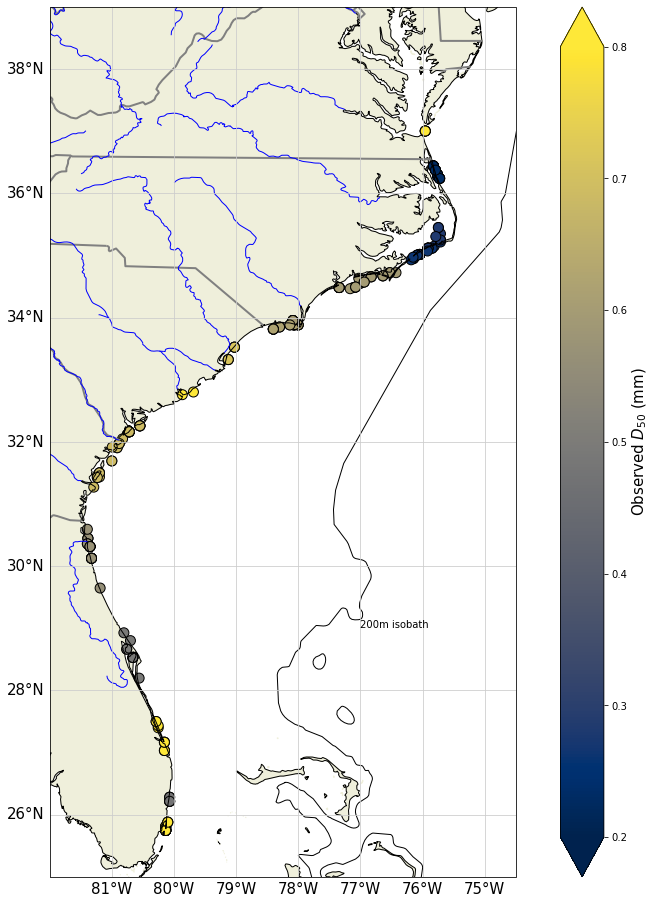

In [507]:

crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
# plt.xlabel('Longitude', fontsize=16)
# plt.ylabel('Latitude', fontsize=16)
ax = plt.axes(projection=crs)
ax.set_extent([-82, -74.5, 25, 39], crs=ccrs.PlateCarree())

# ax.set_extent([-79, -77, 33, 35], crs=ccrs.PlateCarree())

ax.coastlines(resolution='10m')

# Put a background image on for nice sea rendering.
# ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)
# ax.add_feature(cfeature.OCEAN)

bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, facecolor='none', edgecolor='black')

ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

ax.text(-77, 29, '200m isobath', transform=ccrs.Geodetic())

gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.scatter(tmp['longitude'],tmp['latitude'],100,tmp['d50'], cmap='cividis', vmin=0.2, vmax=0.8, lw=1,edgecolors='black')
# plt.legend(loc=4)
cb=plt.colorbar(extend='both')
cb.set_label('Observed $D_{50}$ (mm)', fontsize=15)

plt.savefig('CGRASP_d50-observed-map.jpg', dpi=300, bbox_inches='tight')

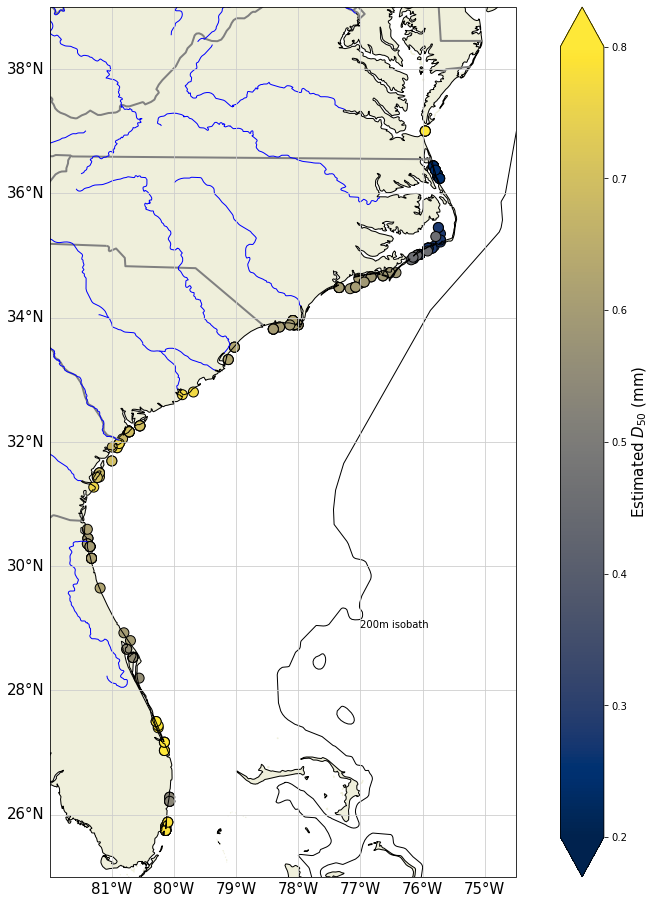

In [504]:

crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
# plt.xlabel('Longitude', fontsize=16)
# plt.ylabel('Latitude', fontsize=16)
ax = plt.axes(projection=crs)
ax.set_extent([-82, -74.5, 25, 39], crs=ccrs.PlateCarree())

# ax.set_extent([-79, -77, 33, 35], crs=ccrs.PlateCarree())

ax.coastlines(resolution='10m')

# Put a background image on for nice sea rendering.
# ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)
# ax.add_feature(cfeature.OCEAN)

bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, facecolor='none', edgecolor='black')

ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

ax.text(-77, 29, '200m isobath', transform=ccrs.Geodetic())

gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.scatter(tmp['longitude'],tmp['latitude'],100,ds_est, cmap='cividis', vmin=0.2, vmax=0.8, lw=1,edgecolors='black')
# plt.legend(loc=4)
cb=plt.colorbar(extend='both')
cb.set_label('Estimated $D_{50}$ (mm)', fontsize=15)

plt.savefig('CGRASP_d50-slope-tide-predict-map.jpg', dpi=300, bbox_inches='tight')

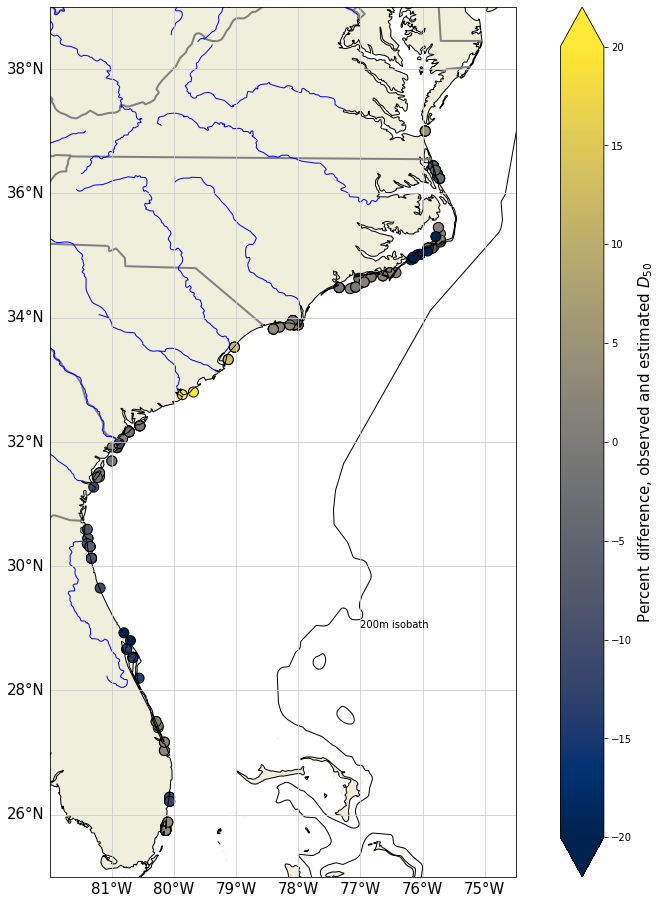

In [505]:

crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
# plt.xlabel('Longitude', fontsize=16)
# plt.ylabel('Latitude', fontsize=16)
ax = plt.axes(projection=crs)
ax.set_extent([-82, -74.5, 25, 39], crs=ccrs.PlateCarree())

# ax.set_extent([-79, -77, 33, 35], crs=ccrs.PlateCarree())

ax.coastlines(resolution='10m')

# Put a background image on for nice sea rendering.
# ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)
# ax.add_feature(cfeature.OCEAN)

bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, facecolor='none', edgecolor='black')

ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

ax.text(-77, 29, '200m isobath', transform=ccrs.Geodetic())

gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.scatter(tmp['longitude'],tmp['latitude'],100,100*((tmp['d50']-ds_est)/tmp['d50']), cmap='cividis', vmin=-20, vmax=20, lw=1,edgecolors='black')
# plt.legend(loc=4, fontsize=12)
cb=plt.colorbar(extend='both')
cb.set_label('Percent difference, observed and estimated $D_{50}$', fontsize=15)

plt.savefig('CGRASP_d50-slope-tide-predict-map-diff.jpg', dpi=300, bbox_inches='tight')

!montage -geometry 2720x3764 -tile 3x1 CGRASP_d50-observed-map.jpg CGRASP_d50-slope-tide-predict-map.jpg CGRASP_d50-slope-tide-predict-map-diff.jpg d50-maps_3panel.png

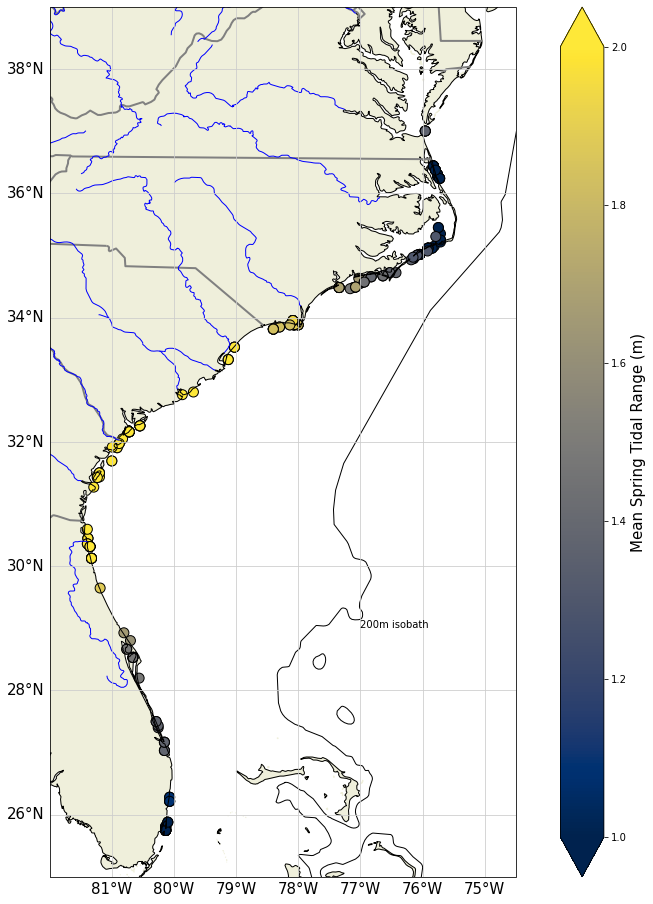

In [508]:

crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
# plt.xlabel('Longitude', fontsize=16)
# plt.ylabel('Latitude', fontsize=16)
ax = plt.axes(projection=crs)
ax.set_extent([-82, -74.5, 25, 39], crs=ccrs.PlateCarree())

# ax.set_extent([-79, -77, 33, 35], crs=ccrs.PlateCarree())

ax.coastlines(resolution='10m')

# Put a background image on for nice sea rendering.
# ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)
# ax.add_feature(cfeature.OCEAN)

bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, facecolor='none', edgecolor='black')

ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

ax.text(-77, 29, '200m isobath', transform=ccrs.Geodetic())

gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.scatter(tmp['longitude'],tmp['latitude'],100,tmp['mstr'], cmap='cividis', vmin=1, vmax=2, lw=1,edgecolors='black')
# plt.legend(loc=4, fontsize=12)
cb=plt.colorbar(extend='both')
cb.set_label('Mean Spring Tidal Range (m)', fontsize=15)

plt.savefig('CGRASP_mstr-map.jpg', dpi=300, bbox_inches='tight')

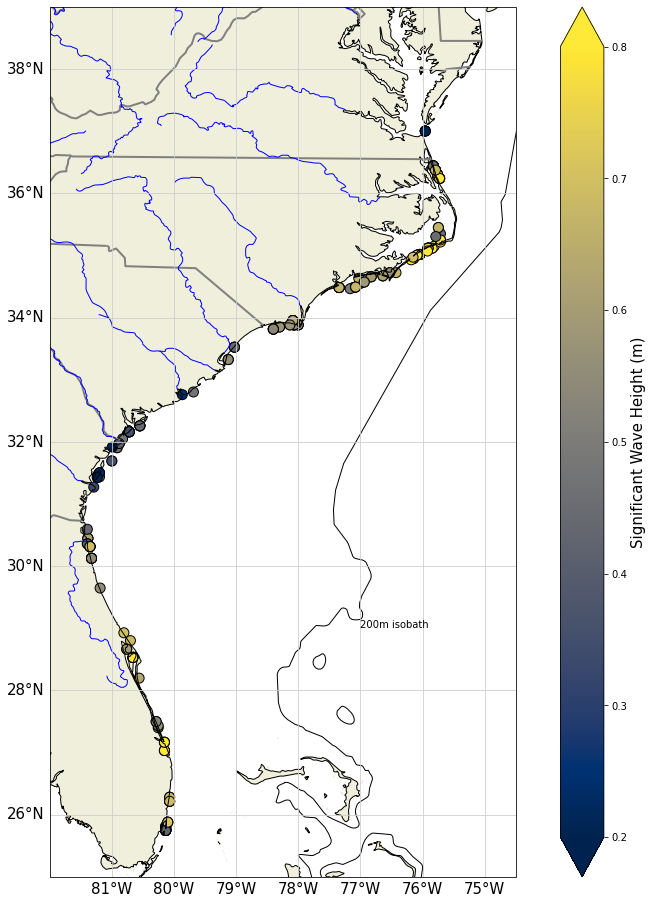

In [512]:

crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
# plt.xlabel('Longitude', fontsize=16)
# plt.ylabel('Latitude', fontsize=16)
ax = plt.axes(projection=crs)
ax.set_extent([-82, -74.5, 25, 39], crs=ccrs.PlateCarree())

# ax.set_extent([-79, -77, 33, 35], crs=ccrs.PlateCarree())

ax.coastlines(resolution='10m')

# Put a background image on for nice sea rendering.
# ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)
# ax.add_feature(cfeature.OCEAN)

bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, facecolor='none', edgecolor='black')

ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

ax.text(-77, 29, '200m isobath', transform=ccrs.Geodetic())

gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.scatter(tmp['longitude'],tmp['latitude'],100,tmp['hs_mean'], cmap='cividis', vmin=.2, vmax=.8, lw=1,edgecolors='black')
# plt.legend(loc=4, fontsize=12)
cb=plt.colorbar(extend='both')
cb.set_label('Significant Wave Height (m)', fontsize=15)

plt.savefig('CGRASP_hs-map.jpg', dpi=300, bbox_inches='tight')

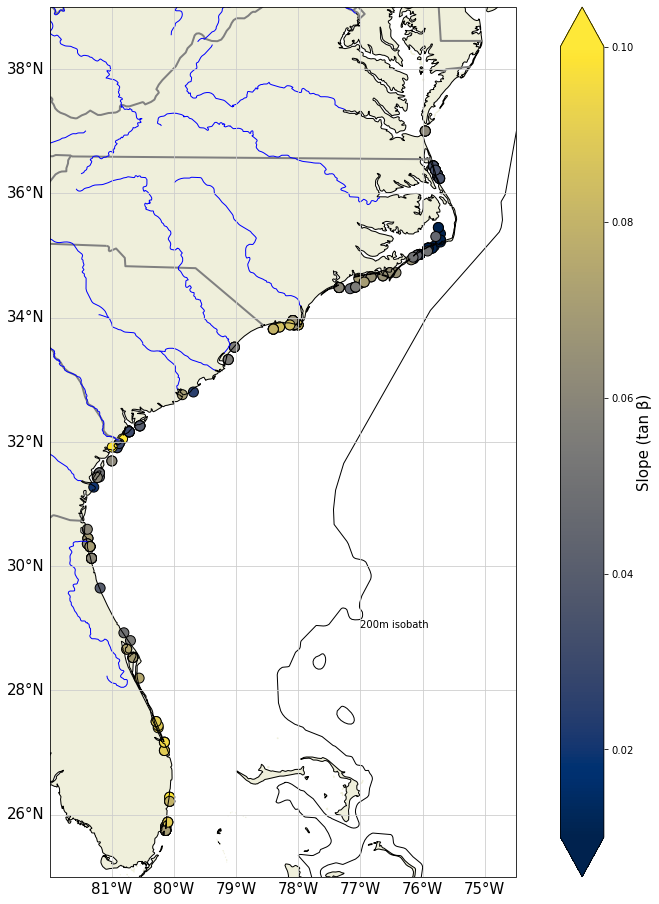

In [510]:

crs = ccrs.PlateCarree()

plt.figure(figsize=(16,16))
# plt.xlabel('Longitude', fontsize=16)
# plt.ylabel('Latitude', fontsize=16)
ax = plt.axes(projection=crs)
ax.set_extent([-82, -74.5, 25, 39], crs=ccrs.PlateCarree())

# ax.set_extent([-79, -77, 33, 35], crs=ccrs.PlateCarree())

ax.coastlines(resolution='10m')

# Put a background image on for nice sea rendering.
# ax.stock_img()

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(cfeature.LAND)
# ax.add_feature(cfeature.COASTLINE)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)
# ax.add_feature(cfeature.OCEAN)

bathym = cfeature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical')
ax.add_feature(bathym, facecolor='none', edgecolor='black')

ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

ax.text(-77, 29, '200m isobath', transform=ccrs.Geodetic())

gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.scatter(tmp['longitude'],tmp['latitude'],100,tmp['beach_slope'], cmap='cividis', vmin=0.01, vmax=.1, lw=1,edgecolors='black')
# plt.legend(loc=4, fontsize=12)
cb=plt.colorbar(extend='both')
cb.set_label('Slope (tan β)', fontsize=15)

plt.savefig('CGRASP_slope-map.jpg', dpi=300, bbox_inches='tight')

!montage -geometry 2720x3764 -tile 3x1 CGRASP_slope-map.jpg CGRASP_mstr-map.jpg CGRASP_hs-map.jpg model-inputs-maps_3panel.png